# Customer Personality Analysis - EDA 

### **Content**
#### **Attributes**

**People**

- **ID**: Identificador único del cliente  
- **Year_Birth**: Año de nacimiento del cliente  
- **Education**: Nivel educativo del cliente  
- **Marital_Status**: Estado civil del cliente  
- **Income**: Ingreso anual del hogar del cliente  
- **Kidhome**: Número de hijos en el hogar del cliente  
- **Teenhome**: Número de adolescentes en el hogar del cliente  
- **Dt_Customer**: Fecha de inscripción del cliente en la empresa  
- **Recency**: Número de días desde la última compra del cliente  
- **Complain**: 1 si el cliente se ha quejado en los últimos 2 años, 0 en caso contrario  

**Products**

- **MntWines**: Cantidad gastada en vino en los últimos 2 años  
- **MntFruits**: Cantidad gastada en frutas en los últimos 2 años  
- **MntMeatProducts**: Cantidad gastada en productos de carne en los últimos 2 años  
- **MntFishProducts**: Cantidad gastada en productos de pescado en los últimos 2 años  
- **MntSweetProducts**: Cantidad gastada en dulces en los últimos 2 años  
- **MntGoldProds**: Cantidad gastada en productos de oro en los últimos 2 años  

**Promotion**

- **NumDealsPurchases**: Número de compras realizadas con descuento  
- **AcceptedCmp1**: 1 si el cliente aceptó la oferta en la 1ª campaña, 0 en caso contrario  
- **AcceptedCmp2**: 1 si el cliente aceptó la oferta en la 2ª campaña, 0 en caso contrario  
- **AcceptedCmp3**: 1 si el cliente aceptó la oferta en la 3ª campaña, 0 en caso contrario  
- **AcceptedCmp4**: 1 si el cliente aceptó la oferta en la 4ª campaña, 0 en caso contrario  
- **AcceptedCmp5**: 1 si el cliente aceptó la oferta en la 5ª campaña, 0 en caso contrario  
- **Response**: 1 si el cliente aceptó la oferta en la última campaña, 0 en caso contrario  

**Place**

- **NumWebPurchases**: Número de compras realizadas a través del sitio web de la empresa  
- **NumCatalogPurchases**: Número de compras realizadas utilizando un catálogo  
- **NumStorePurchases**: Número de compras realizadas directamente en tiendas  
- **NumWebVisitsMonth**: Número de visitas al sitio web de la empresa en el último mes

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
import pandas as pd

df = pd.read_csv('marketing_campaign.csv', sep='\t')
df.drop('ID', axis=1, inplace=True)

df.head()

,Year_Birth,Education,Marital_Status,Income,Kidhome,Teenhome,Dt_Customer,Recency,MntWines,MntFruits,...,NumWebVisitsMonth,AcceptedCmp3,AcceptedCmp4,AcceptedCmp5,AcceptedCmp1,AcceptedCmp2,Complain,Z_CostContact,Z_Revenue,Response
0,1957,Graduation,Single,58138.0,0,0,04-09-2012,58,635,88,...,7,0,0,0,0,0,0,3,11,1
1,1954,Graduation,Single,46344.0,1,1,08-03-2014,38,11,1,...,5,0,0,0,0,0,0,3,11,0
2,1965,Graduation,Together,71613.0,0,0,21-08-2013,26,426,49,...,4,0,0,0,0,0,0,3,11,0
3,1984,Graduation,Together,26646.0,1,0,10-02-2014,26,11,4,...,6,0,0,0,0,0,0,3,11,0
4,1981,PhD,Married,58293.0,1,0,19-01-2014,94,173,43,...,5,0,0,0,0,0,0,3,11,0


In [4]:
# Lista de variables relacionadas a People
people = ["Year_Birth", "Education", "Marital_Status", "Income", "Kidhome", "Teenhome", "Dt_Customer", "Recency", "Complain"]

# Lista de variables relacionadas a Products
products = ["MntWines", "MntFruits", "MntMeatProducts", "MntFishProducts", "MntSweetProducts", "MntGoldProds"]

# Lista de variables relacionadas a Promotion
promotion = ["NumDealsPurchases", "AcceptedCmp1", "AcceptedCmp2", "AcceptedCmp3", "AcceptedCmp4", "AcceptedCmp5", "Response"]

# Lista de variables relacionadas a Place
place = ["NumWebPurchases", "NumCatalogPurchases", "NumStorePurchases", "NumWebVisitsMonth"]


## Analisis de Distribuciones

In [5]:
from tools_ml import recursos_graficos as rg 


### Variables relacionadas a People

#### 'Year_Birth'

Year_Birth 
Minimum:1893.00
Mean:1968.81
Median:1970.00
Mode:1976.00
Maximum:1996.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


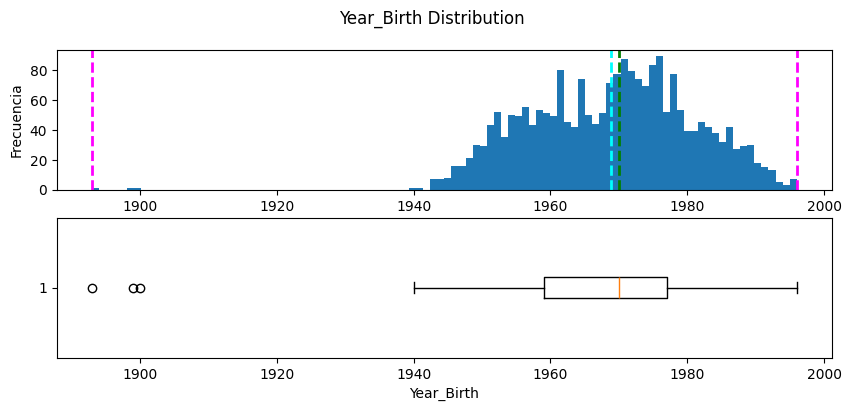

In [6]:

rg.distribution_Data(df['Year_Birth'])

Distribucion relativamente simetrica presentando solo unos cuantos outliers para personas nacidas antes de 1900 (lo cual es muy raro ya que el set de datos es del año 2013). Posiblemente se obte por elimar estos registros ya que son exagerados y muy excasos

#### 'Income'

Income 
Minimum:1730.00
Mean:52247.25
Median:51381.50
Mode:7500.00
Maximum:666666.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


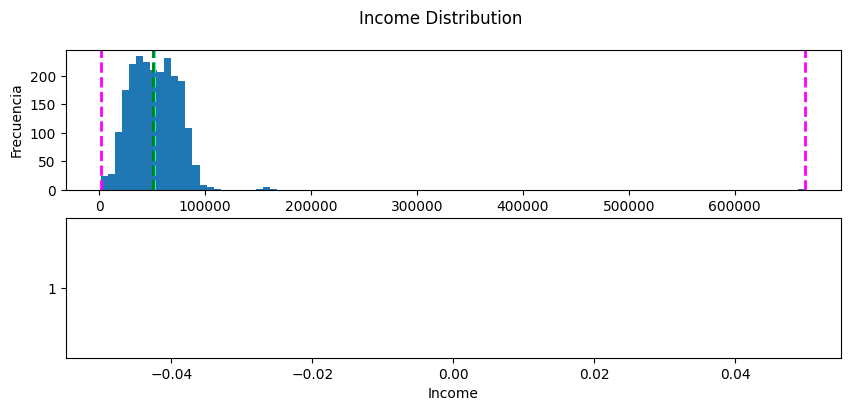

In [7]:
rg.distribution_Data(df['Income'])

Se muestra una distribucion normal, con unos cuantos outliers que facilmente podriamos descartar para evitar complicaciones en la clusterizacion

#### 'Education'

In [8]:
rg.histogram(df, 'Education')

Clases desbalanceadas precentando una mayor cantidad de datos para la clase graduados. 

#### 'Marital_Status'

In [9]:
rg.histogram(df, 'Marital_Status')

Categorias relativamente balanceadas, para los cosas con categorias demasiado minoritarias como las 3 ultimas se puede optar por transformar estos datos y que pertenezcan a una de las categorias mayoritarias con mayor similitud

#### Complain

In [10]:
rg.histogram(df, 'Complain')

El 99% de los clientes no se ha quejado en los ultimos 2 años, solo 21 casos de quejas confirmados. Esta variable puede ser da las que se puedan descartar por su poco impacto ya que la clase mayoritaria es altamente superior a la minoritaria.

#### 'Recency'

Recency 
Minimum:0.00
Mean:49.11
Median:49.00
Mode:56.00
Maximum:99.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



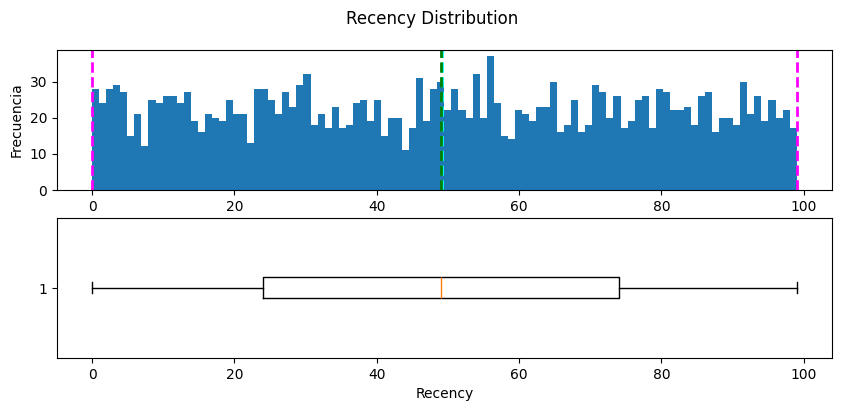

In [14]:
rg.distribution_Data(df['Recency'])

Variable que representa datos en todo su rango, puede ser util al momento de discriminar clusters

#### 'Teenhome'

In [11]:
rg.histogram(df, 'Teenhome')

Variable que presenta 3 clases de las cuales la minoritaria esta desmasiado desbalanceada respecto a las 2 anteriores. Se puede tener en cuenta transformar los datos de esta clase minoritaria, y asi llevarlos a la clase que mayor se le parezca. 

#### 'Kighome'

In [12]:
rg.histogram(df, 'Kidhome')

Caso muy similar a la variable 'Teemhome'. Se puede optar por realizar el mismo procedimiento y asi no perder datos. 

#### 'Dt_customer'

In [15]:
import numpy as np
dc_order = df['Dt_Customer'].values
df_dt  = pd.DataFrame(np.sort(dc_order), columns=['Dt Customer'])

rg.histogram(df_dt)

Luego de ordernar esta variable en forma ascendente ya que son fechas, no podemos notar cambios o patrones ciclicos para esta variable, y ya que tienen muchas dimensiones que no son agrupables se optara por descartarla para el proceso de clusering

### Variables relacionadas a Products

Al ser variables relacionadas con precios (gastos en productos), podremos tener una mejor vision de esto usando una distribuciones

MntWines 
Minimum:0.00
Mean:303.94
Median:173.50
Mode:2.00
Maximum:1493.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



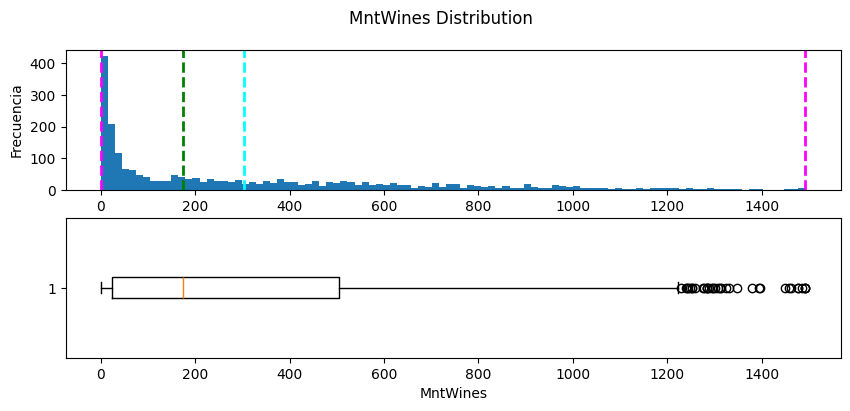

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



MntFruits 
Minimum:0.00
Mean:26.30
Median:8.00
Mode:0.00
Maximum:199.00



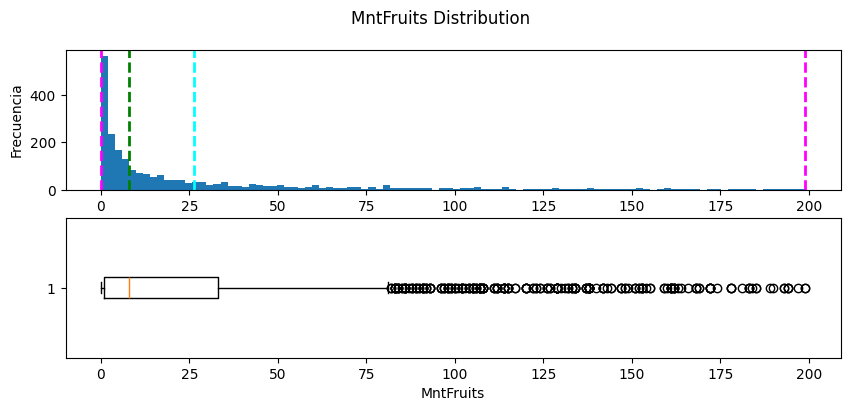

MntMeatProducts 
Minimum:0.00
Mean:166.95
Median:67.00
Mode:7.00
Maximum:1725.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



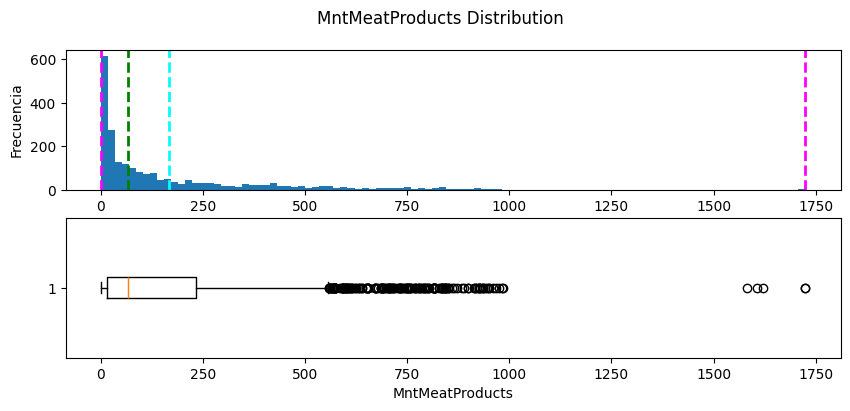

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



MntFishProducts 
Minimum:0.00
Mean:37.53
Median:12.00
Mode:0.00
Maximum:259.00



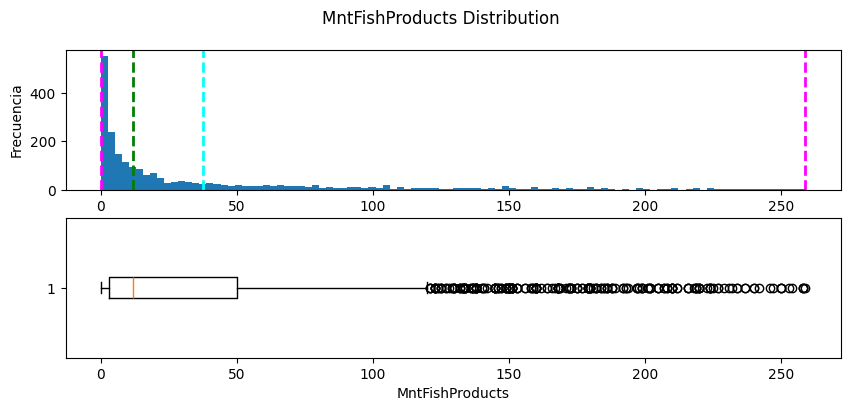

MntSweetProducts 
Minimum:0.00
Mean:27.06
Median:8.00
Mode:0.00
Maximum:263.00



c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



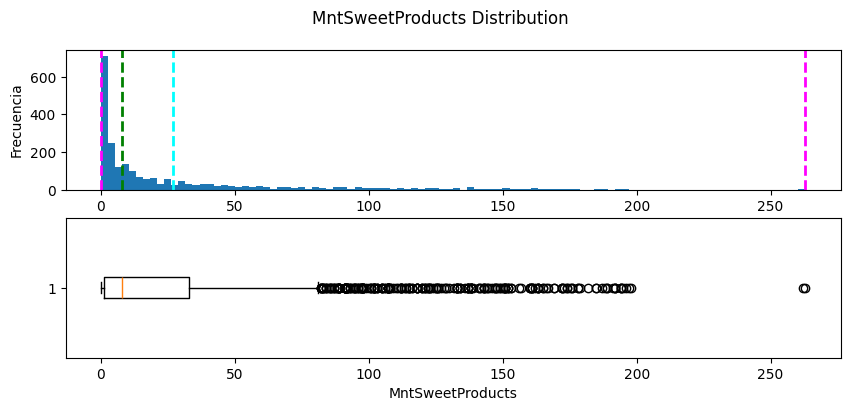

c:\Users\Ares\AppData\Local\Programs\Python\Python312\Lib\site-packages\tools_ml\recursos_graficos.py:164: UserWarning:

FigureCanvasAgg is non-interactive, and thus cannot be shown



MntGoldProds 
Minimum:0.00
Mean:44.02
Median:24.00
Mode:1.00
Maximum:362.00



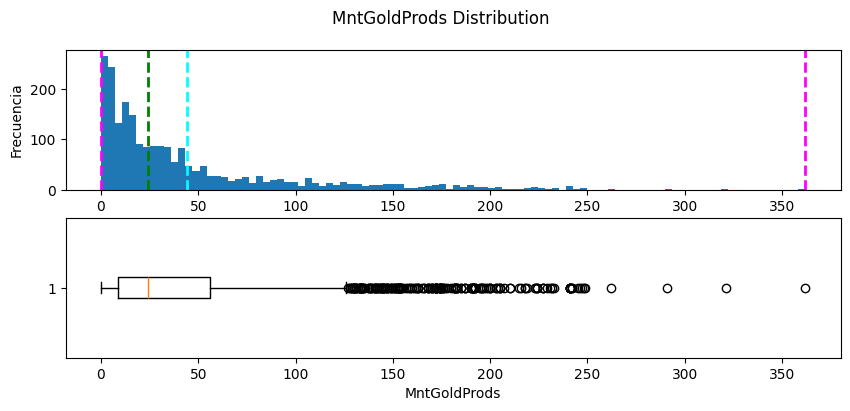

In [16]:
for product in products:
    rg.distribution_Data(df[product])

## Análsis de Correlaciones 

In [13]:
from tools_ml.eval_data import filtrar_correlaciones

num_cols = [col for col in df.columns if df[col].dtype != 'object']     # Variables numericas
cat_cols = [col for col in df.columns if df[col].dtype == 'object']     # Variables categorica

filtrar_correlaciones(df[num_cols], umbrales=[-0.3,0.5])

Year_Birth           Teenhome              -0.352111
Income               Kidhome               -0.428669
                     MntWines               0.578650
                     MntMeatProducts        0.584633
                     NumCatalogPurchases    0.589162
                     NumStorePurchases      0.529362
                     NumWebVisitsMonth     -0.553088
Kidhome              MntWines              -0.496297
                     MntFruits             -0.372581
                     MntMeatProducts       -0.437129
                     MntFishProducts       -0.387644
                     MntSweetProducts      -0.370673
                     MntGoldProds          -0.349595
                     NumWebPurchases       -0.361647
                     NumCatalogPurchases   -0.502237
                     NumStorePurchases     -0.499683
MntWines             MntMeatProducts        0.562667
                     NumWebPurchases        0.542265
                     NumCatalogPurchases    0.

La correlaciones mas observables estan relacionadas con las variables `income` y `Kidhome`. En la primera se muestran correlaciones directas, esto quiere decir que a mayor ingreso mayor consumo de parte de ciertos productos pero tambien menor cantidad de hijos (0 o 1). Respecto a la segunda tenemos varias autocorrelaciones inversas que aunque no presentan un valor absoluto mayor al 0.5, pueden reflejar que la presencia de niños en casa refleja la disminucion de otros gastos o al reves, que una menor cantidad de hijos aumenta los gastos en productos como cares y vinos. 

Otra conclusion importante esta relacionados a la variable `NumWebVisitMonth`, la cual muestra una correlacion negativa con casi todas las variables relacionadas a visitas de productos, esto puede reflejar la ineficiencia de la web siendo llamativa parael cliente o tambien el contexto social de sus usuarios (personas mayores no estarian tan interesados en estos temas y es un estudio del 2013). 


In [14]:
# Variables con fuerte correlacion
filtrar_correlaciones(df[num_cols], 0.6)

MntWines         NumCatalogPurchases    0.635226
                 NumStorePurchases      0.642100
MntMeatProducts  NumCatalogPurchases    0.723827
dtype: float64

En cuanto a variables con correlacion mas fuerte tenemos a este grupo de 4 que estan relacionadas con el consumo de vinos y carnes que fueron comprados por catalogo o directamente en tienda.

##